# *GAPDH* Iso-Seq

Here we visualize PacBio Iso-Seq RNA sequencing data for the *GAPDH* gene. The sequencing data was generated from the [GM12878 lymphoblastoid cell line](https://web.archive.org/web/20230212111219/https://www.coriell.org/0/Sections/Search/Sample_Detail.aspx?Ref=GM12878), which originated from the NA12878 individual from the [1000 Genomes cohort](https://www.internationalgenome.org/).

Data sources:
- PacBio Iso-Seq RNA sequencing: [URL](https://downloads.pacbcloud.com/public/dataset/MAS-Seq/DATA-SQ2-PBMC_5kcells/2-DeduplicatedReads/scisoseq.5p--3p.tagged.refined.corrected.sorted.dedup.bam)
- Gene annotation: [URL](https://ftp.ncbi.nlm.nih.gov/refseq/H_sapiens/annotation/GRCh37_latest/refseq_identifiers/GRCh37_latest_genomic.gff.gz)

In [3]:
import gzip
import lakeview as lv

In [13]:
CHROMOSOME, START, END = "chr12", int(6.643e6), int(6.648e6)
RNA_BAM_PATH = "../../tests/data/GM12878_RNAseq_GAPDH.sample=0.002.bam"
REFSEQ_GFF_PATH = "../../tests/data/Refseq_GRCh37_genomic_annotation.gff.gz"


alignment_painter = lv.SequenceAlignment.from_file(RNA_BAM_PATH, CHROMOSOME)
with gzip.open(REFSEQ_GFF_PATH, "rt") as f:
    annotation_painter = lv.GeneAnnotation.from_refseq(
        f, "gff3", region=("NC_000012.11", (START, END))
    )

gv = lv.GenomeViewer(3, figsize=(8, 8), height_ratios=(1, 7, 3))
alignment_painter.draw_pileup(gv.axes[0], show_mismatches=False)
alignment_painter.draw_alignment(
    gv.axes[1],
    show_arrowheads=False,
    show_soft_clippings=False,
    show_hard_clippings=False,
    show_mismatches=True,
    max_rows=50,
    show_group_labels=False,
    show_group_separators=False,
)
annotation_painter.draw_transcripts(gv.axes[2], arrows_kw=dict(style="fishbone"))
gv.set_xlim(6.643e6, 6.648e6)
gv.set_xlabel(f"{CHROMOSOME}")
gv.set_title(r"GM12878 $\it{GAPDH}$ Iso-Seq")

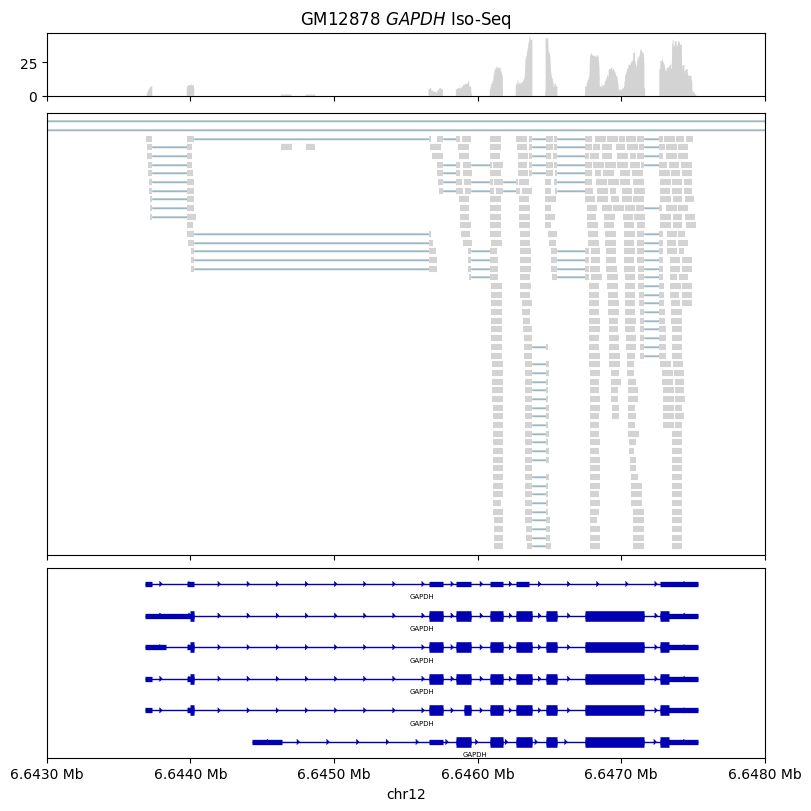

In [14]:
gv.figure